In [90]:
# Importing required libraries -
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [3]:
data = pd.read_csv('delhivery_data.csv')
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144867.0,961.262986,1037.012769,20.000000,161.000000,449.000000,1634.000000,7898.000000
cutoff_factor,144867.0,232.926567,344.755577,9.000000,22.000000,66.000000,286.000000,1927.000000
actual_distance_to_destination,144867.0,234.073372,344.990009,9.000045,23.355874,66.126571,286.708875,1927.447705
actual_time,144867.0,416.927527,598.103621,9.000000,51.000000,132.000000,513.000000,4532.000000
osrm_time,144867.0,213.868272,308.011085,6.000000,27.000000,64.000000,257.000000,1686.000000
osrm_distance,144867.0,284.771297,421.119294,9.008200,29.914700,78.525800,343.193250,2326.199100
factor,144867.0,2.120107,1.715421,0.144000,1.604264,1.857143,2.213483,77.387097
segment_actual_time,144867.0,36.196111,53.571158,-244.000000,20.000000,29.000000,40.000000,3051.000000
segment_osrm_time,144867.0,18.507548,14.775960,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144867.0,22.829020,17.860660,0.000000,12.070100,23.513000,27.813250,2191.403700


In [8]:
data.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [9]:
data['route_type'].value_counts()

FTL        99660
Carting    45207
Name: route_type, dtype: int64

In [10]:
data['data'].value_counts()

training    104858
test         40009
Name: data, dtype: int64

In [11]:
data.shape

(144867, 24)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [15]:
print(f" Missing value in source_name feature: {data['source_name'].isnull().sum()}")
print(f" Missing value in destination_name feature: {data['destination_name'].isnull().sum()}")

 Missing value in source_name feature: 293
 Missing value in destination_name feature: 261


In [16]:
columns = data.columns

for col in columns:
    print(f" Missing value in {col} feature: {data[col].isnull().sum()}")

 Missing value in data feature: 0
 Missing value in trip_creation_time feature: 0
 Missing value in route_schedule_uuid feature: 0
 Missing value in route_type feature: 0
 Missing value in trip_uuid feature: 0
 Missing value in source_center feature: 0
 Missing value in source_name feature: 293
 Missing value in destination_center feature: 0
 Missing value in destination_name feature: 261
 Missing value in od_start_time feature: 0
 Missing value in od_end_time feature: 0
 Missing value in start_scan_to_end_scan feature: 0
 Missing value in is_cutoff feature: 0
 Missing value in cutoff_factor feature: 0
 Missing value in cutoff_timestamp feature: 0
 Missing value in actual_distance_to_destination feature: 0
 Missing value in actual_time feature: 0
 Missing value in osrm_time feature: 0
 Missing value in osrm_distance feature: 0
 Missing value in factor feature: 0
 Missing value in segment_actual_time feature: 0
 Missing value in segment_osrm_time feature: 0
 Missing value in segment_osr

In [18]:
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

#### From above, we can see that there are some missing values in "source_name" and "destination_name" and there are no missing values in other features.

In [75]:
missingIndexSource = []
for i, dt in enumerate(data['source_name']):
    if(type(dt)!=str):
        missingIndexSource.append(i)
print(len(missingIndexSource))

293


In [80]:
data.iloc[missingIndexSource].head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 14:09:19,22.783440,48.0,34.0,37.7749,1.411765,48.0,34.0,37.7749,1.411765
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 13:19:23,46.071250,98.0,41.0,56.3575,2.390244,49.0,33.0,34.1661,1.484848
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:49:33,67.714993,127.0,58.0,80.4811,2.189655,29.0,17.0,24.1236,1.705882
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 12:21:18,88.149642,156.0,73.0,101.2556,2.136986,28.0,14.0,20.7746,2.000000
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,...,2018-09-26 11:25:24,112.691981,212.0,92.0,127.9860,2.304348,55.0,18.0,26.7304,3.055556


In [77]:
missingIndexDestination = []
for i, dt in enumerate(data['destination_name']):
    if(type(dt)!=str):
        missingIndexDestination.append(i)
print(len(missingIndexDestination))

261


In [79]:
data.iloc[missingIndexDestination].head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
110,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,...,2018-09-26 05:57:25,24.538214,58.0,33.0,30.8845,1.757576,58.0,33.0,30.8845,1.757576
111,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342601AAA,Piparcity_BsstdDPP_D (Rajasthan),IND342902A1B,NaN,2018-09-26 05:04:49.254901,...,2018-09-26 05:04:49.254901,34.657709,110.0,43.0,41.5361,2.558140,52.0,10.0,10.6517,5.200000
982,test,2018-10-01 20:56:18.155260,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153842737815495661,IND573103AAA,Arsikere_HsnRdDPP_D (Karnataka),IND577116AAA,NaN,2018-10-02 01:22:21.450243,...,2018-10-02 01:38:30,22.029639,21.0,16.0,22.9630,1.312500,21.0,16.0,22.9630,1.312500
983,test,2018-10-01 20:56:18.155260,thanos::sroute:d0ebdacd-e09b-47d3-be77-c9c4a05...,FTL,trip-153842737815495661,IND573103AAA,Arsikere_HsnRdDPP_D (Karnataka),IND577116AAA,NaN,2018-10-02 01:22:21.450243,...,2018-10-02 01:23:30,35.528960,36.0,25.0,36.5050,1.440000,15.0,9.0,13.5420,1.666667
4882,training,2018-09-24 07:18:06.087341,thanos::sroute:2f43f11e-d3ba-4590-9355-82928e1...,FTL,trip-153777348608709328,IND202001AAB,Aligarh_KhirByps_I (Uttar Pradesh),IND282002AAD,NaN,2018-09-24 15:02:13.760270,...,2018-09-24 18:06:49,22.193687,40.0,26.0,28.9817,1.538462,40.0,26.0,28.9817,1.538462


In [86]:
data['source_name'] = data['source_name'].fillna(data.source_center)
data['destination_name'] = data['destination_name'].fillna(data.source_center)

In [87]:
data.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

#### Here I treated missing value of "source_name" with 'source_center' and "destination_name" with 'destination_center' as this makes more sense compare to any other missing value treatment.

In [94]:
def univariate_plot(x,y):
  fig = plt.figure(figsize=(15,5))
  ax2 = fig.add_subplot(121)
  sns.boxplot(x,ax=ax2, data = data)
  ax = fig.add_subplot(122)
  sns.histplot(x,kde=True,ax=ax)
  ax.axvline(x.mean(), color='orange', linestyle='-',linewidth=1.5)
  ax.axvline(x.median(), color='red', linestyle='-.',linewidth=1.5)
  ax.axvline(x.mode()[0], color='green', linestyle='--',linewidth=1.5)
  ax.legend(labels=['kde','mean','median','mode'])
  ax.set_title(str(y))
  ax2.set_title(str(y))
  plt.show()

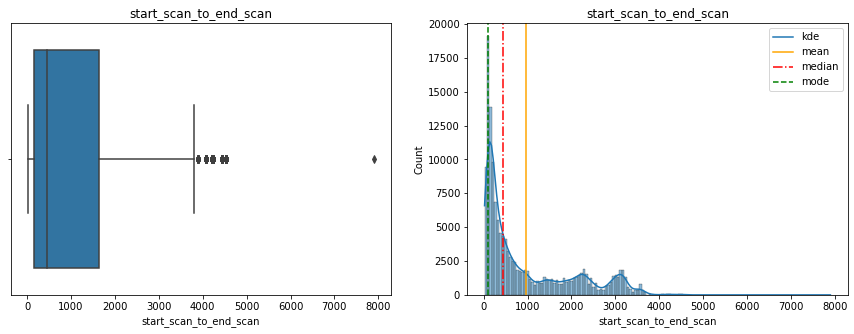

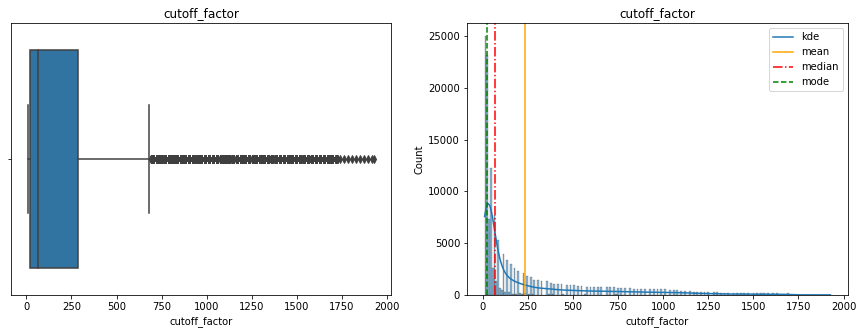

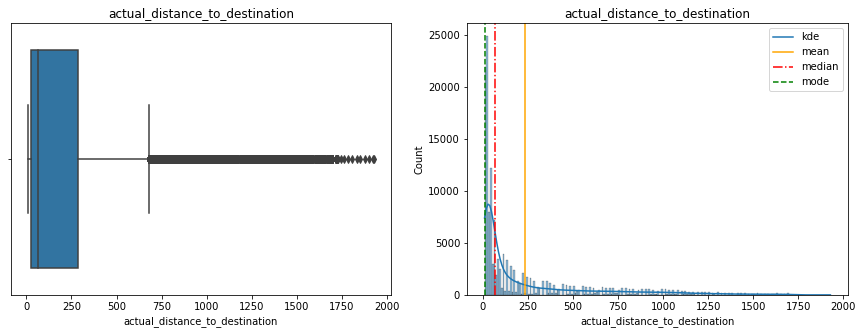

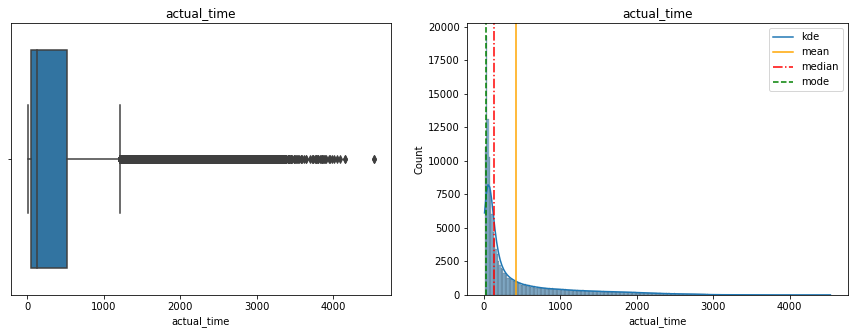

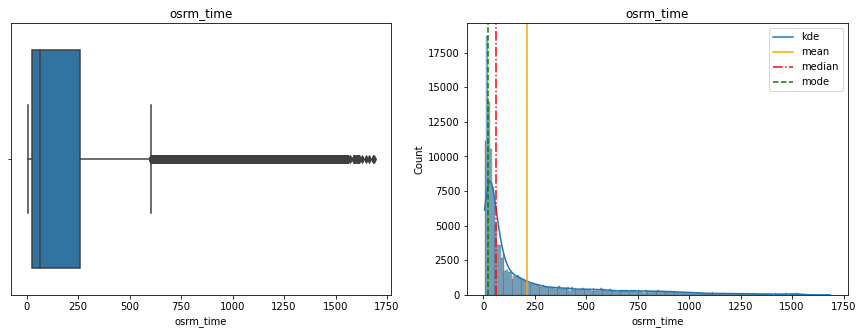

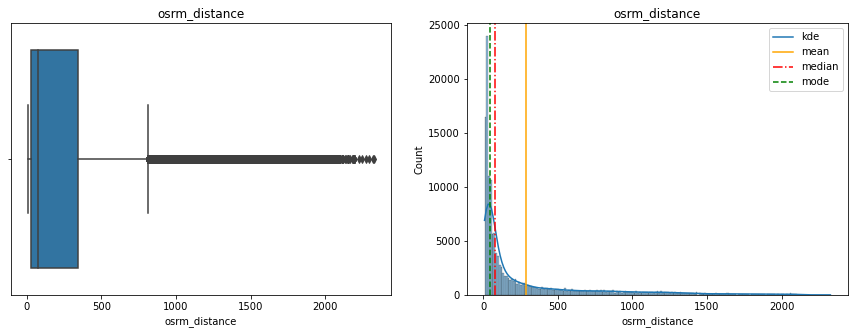

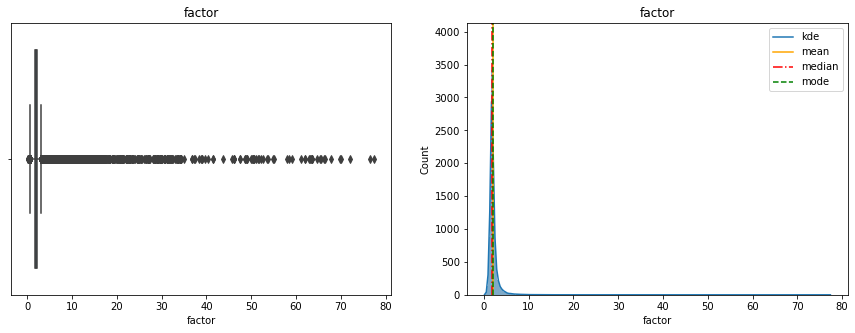

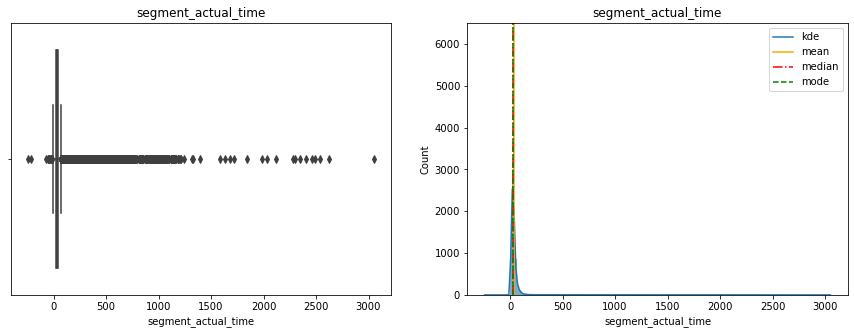

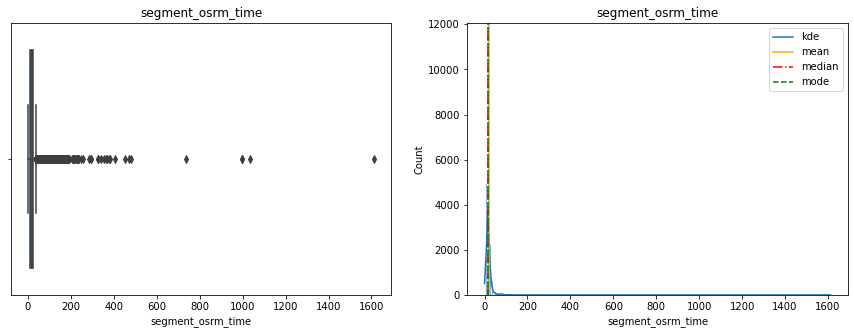

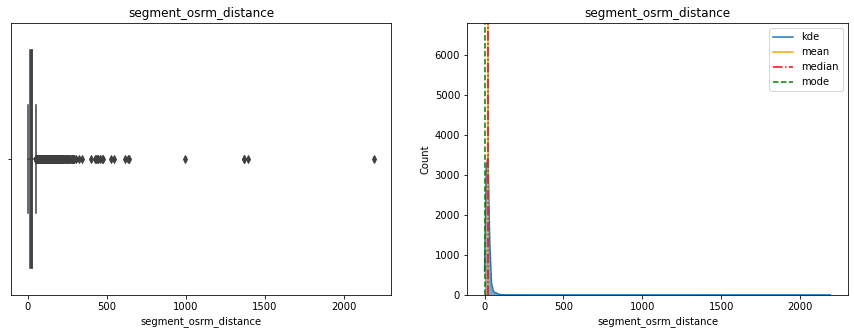

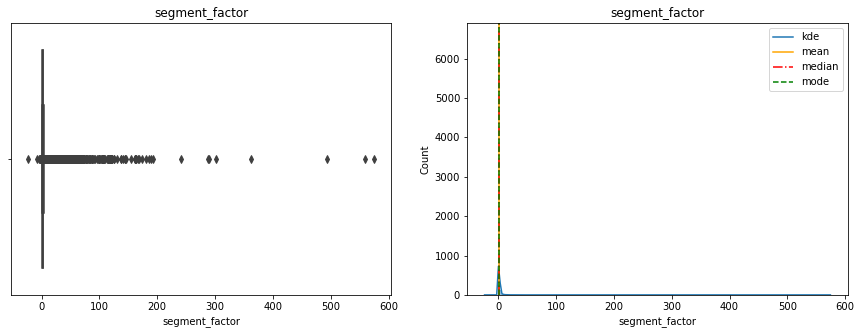

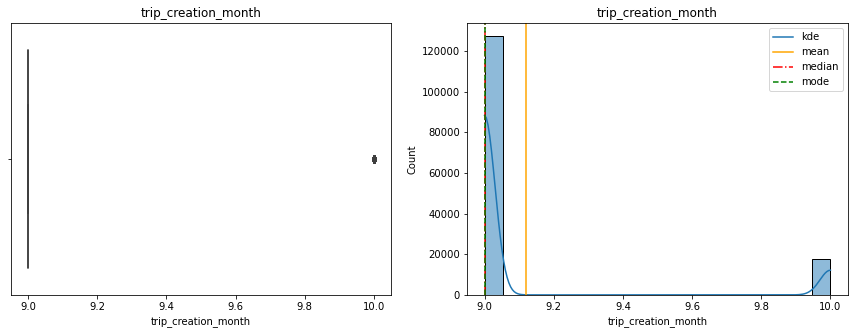

F:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


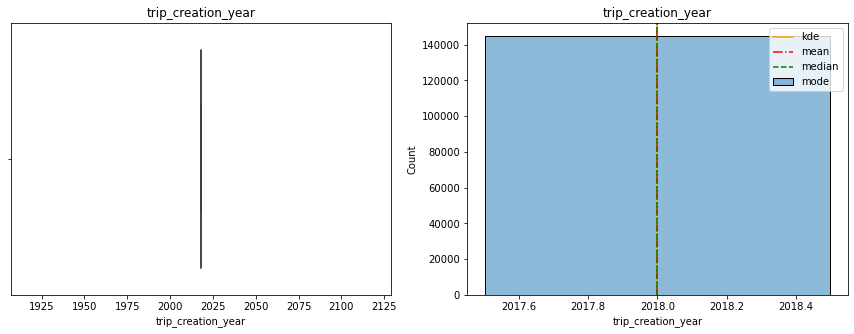

In [283]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

for i in list(data.select_dtypes(include=["number"]).columns):
  univariate_plot(data[i],i)


In [101]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
# 

In [100]:
# distribution plots of all the continuous variable(s)

In [114]:
type(data['trip_creation_time'][0])

str

In [111]:
data.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [129]:
#Feature Creation

#1. Converting trip_creation_time column from string to datetime object

data['trip_creation_time'] = pd.to_datetime(data['trip_creation_time'])
data['trip_creation_date'] = data['trip_creation_time'].apply(lambda x : x.date())
data['trip_creation_year'] = data['trip_creation_time'].apply(lambda x : x.year)
data['trip_creation_month'] = data['trip_creation_time'].apply(lambda x : x.month)
data['trip_creation_day'] = data['trip_creation_time'].apply( lambda x : x.strftime("%a"))

data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.9653,1.272727,14.0,11.0,11.9653,1.272727,2018-09-20,Thu,9,2018
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,21.7243,1.200000,10.0,9.0,9.7590,1.111111,2018-09-20,Thu,9,2018
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,32.5395,1.428571,16.0,7.0,10.8152,2.285714,2018-09-20,Thu,9,2018
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,45.5620,1.550000,21.0,12.0,13.0224,1.750000,2018-09-20,Thu,9,2018
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,54.2181,1.545455,6.0,5.0,3.9153,1.200000,2018-09-20,Thu,9,2018


In [127]:
data['trip_creation_month'].value_counts()

9     127349
10     17518
Name: trip_creation_month, dtype: int64

In [130]:
data['trip_creation_year'].value_counts()

2018    144867
Name: trip_creation_year, dtype: int64

In [131]:
# From above we can see that we have September and October months of data of year 2018.

In [145]:
#Feature Creation

#2. Extracting details from Source and destination name.

data['source_city'] = data['source_name'].apply(lambda x: x.split('_')[0])
data['source_state'] = data['source_name'].apply(lambda x: x.split('(')[-1][:-1])

data['destination_city'] = data['destination_name'].apply(lambda x: x.split('_')[0])
data['destination_state'] = data['destination_name'].apply(lambda x: x.split('(')[-1][:-1])

In [146]:
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,source_City,source_State,destination_city,destination_state,source_city,source_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat


In [206]:
data[data['trip_uuid']=='trip-153741093647649320'].iloc[:, 10:]

,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,...,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,source_City,source_State,destination_city,destination_state,source_city,source_state
0,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat
1,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat
2,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat
3,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat
4,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat
5,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,...,2018-09-20,Thu,9,2018,Khambhat,Gujarat,Anand,Gujarat,Khambhat,Gujarat
6,2018-09-20 06:36:55.627764,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,...,2018-09-20,Thu,9,2018,Khambhat,Gujarat,Anand,Gujarat,Khambhat,Gujarat
7,2018-09-20 06:36:55.627764,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,...,2018-09-20,Thu,9,2018,Khambhat,Gujarat,Anand,Gujarat,Khambhat,Gujarat
8,2018-09-20 06:36:55.627764,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,...,2018-09-20,Thu,9,2018,Khambhat,Gujarat,Anand,Gujarat,Khambhat,Gujarat
9,2018-09-20 06:36:55.627764,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,...,2018-09-20,Thu,9,2018,Khambhat,Gujarat,Anand,Gujarat,Khambhat,Gujarat


In [193]:
#data[data['trip_uuid']=='trip-153746066843555182'].T
data[:10]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,source_City,source_State,destination_city,destination_state,source_city,source_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20,Thu,9,2018,Anand,Gujarat,Khambhat,Gujarat,Anand,Gujarat
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20,Thu,9,2018,Khambhat,Gujarat,Anand,Gujarat,Khambhat,Gujarat
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20,Thu,9,2018,Khambhat,Gujarat,Anand,Gujarat,Khambhat,Gujarat
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20,Thu,9,2018,Khambhat,Gujarat,Anand,Gujarat,Khambhat,Gujarat
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20,Thu,9,2018,Khambhat,Gujarat,Anand,Gujarat,Khambhat,Gujarat
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20,Thu,9,2018,Khambhat,Gujarat,Anand,Gujarat,Khambhat,Gujarat


In [170]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip_creation_date', 'trip_creation_day', 'trip_creation_month',
       'trip_creation_year', 'source_City', 'source_State', 'destination_city',
       'destination_state', 'source_city', 'source_state'],
      dtype='object')

In [200]:
grouped_data = data.groupby(['trip_uuid', 'source_center', 'destination_center'], sort= False, as_index=False).\
agg({'data': 'first', 
'trip_creation_time': 'max', 
'route_schedule_uuid':'first', 
'route_type':'max', 
'source_center': 'first', 
'source_name': 'first',
'destination_center': 'last',
'destination_name': 'last', 
'od_start_time': 'first', 
'od_end_time': 'first',
'start_scan_to_end_scan':'mean', 
'is_cutoff':'max', 
'cutoff_factor':'mean',
'cutoff_timestamp': 'last', 
'actual_distance_to_destination': 'last', 
'actual_time': 'last',
'osrm_time': 'last', 
'osrm_distance': 'last',
'factor': 'mean', 
'segment_actual_time': 'sum',
'segment_osrm_time': 'sum', 
'segment_osrm_distance': 'sum', 
'segment_factor': 'mean',
'trip_creation_date': 'first', 
'trip_creation_day': 'first', 
'trip_creation_month': 'first',
'trip_creation_year': 'first', 
'source_City': 'first', 
'source_State': 'first', 
'destination_city': 'last',
'destination_state': 'last', 
})

#### Here we have grouped data on 'trip_uuid', 'source_center', 'destination_center' columns. Now we have one row for each different source_id and destination_id in the grouped data. Next will groupby on "trip_uuid" columns and will get the data for each unique trips.

In [216]:
final_grouped_data = grouped_data.groupby('trip_uuid', sort = False).\
agg({'data': 'first', 
'trip_creation_time': 'max', 
'route_schedule_uuid':'first', 
'route_type':'max', 
'source_center': 'first', 
'source_name': 'first',
'destination_center': 'last',
'destination_name': 'last', 
'od_start_time': 'first', 
'od_end_time': 'last',
'start_scan_to_end_scan':'sum', 
'is_cutoff':'max', 
'cutoff_factor':'mean',
'cutoff_timestamp': 'last', 
'actual_distance_to_destination': 'sum', 
'actual_time': 'sum',
'osrm_time': 'sum', 
'osrm_distance': 'sum',
'factor': 'mean', 
'segment_actual_time': 'sum',
'segment_osrm_time': 'sum', 
'segment_osrm_distance': 'sum', 
'segment_factor': 'mean',
'trip_creation_date': 'first', 
'trip_creation_day': 'first', 
'trip_creation_month': 'first',
'trip_creation_year': 'first', 
'source_City': 'first', 
'source_State': 'first', 
'destination_city': 'last',
'destination_state': 'last', 
}).reset_index()
final_grouped_data.head()

,trip_uuid,data,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_distance,segment_factor,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,source_City,source_State,destination_city,destination_state
0,trip-153741093647649320,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 03:21:32.418600,...,102.7106,2.089228,2018-09-20,Thu,9,2018,Anand,Gujarat,Anand,Gujarat
1,trip-153768492602129387,training,2018-09-23 06:42:06.021680,thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc21172...,FTL,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND411033AAA,Pune_Tathawde_H (Maharashtra),2018-09-23 06:42:06.021680,...,130.4089,1.781363,2018-09-23,Sun,9,2018,Bhiwandi,Maharashtra,Pune,Maharashtra
2,trip-153693976643699843,training,2018-09-14 15:42:46.437249,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,IND400011AAA,LowerParel_CP (Maharashtra),IND400072AAD,Mumbai_Chndivli_PC (Maharashtra),2018-09-14 15:42:46.437249,...,18.7941,3.490909,2018-09-14,Fri,9,2018,LowerParel,Maharashtra,Mumbai,Maharashtra
3,trip-153687145942424248,training,2018-09-13 20:44:19.424489,thanos::sroute:76951383-1608-44e4-a284-46d92e8...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND683511AAA,Aluva_Peedika_H (Kerala),2018-09-13 20:44:19.424489,...,560.5092,1.422855,2018-09-13,Thu,9,2018,Bangalore,Karnataka,Aluva,Kerala
4,trip-153825970514894360,test,2018-09-29 22:21:45.149226,thanos::sroute:0904e75c-b3ac-4278-96cf-802835a...,FTL,IND141003AAB,Ludhiana_GillChwk_DC (Punjab),IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),2018-09-30 02:22:04.138164,...,115.7501,1.195547,2018-09-29,Sat,9,2018,Ludhiana,Punjab,Ludhiana,Punjab


<AxesSubplot:xlabel='actual_time', ylabel='actual_distance_to_destination'>

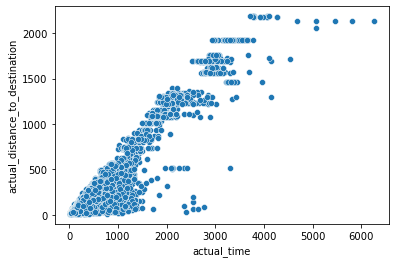

In [222]:
# time and distance feilds
sns.scatterplot(final_grouped_data['actual_time'], final_grouped_data['actual_distance_to_destination'], data = final_grouped_data)

<AxesSubplot:xlabel='osrm_time', ylabel='osrm_distance'>

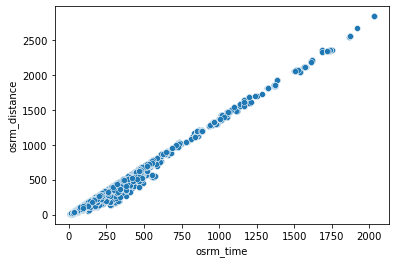

In [219]:
sns.scatterplot(final_grouped_data['osrm_time'], final_grouped_data['osrm_distance'], data = final_grouped_data)

<AxesSubplot:xlabel='segment_actual_time', ylabel='segment_osrm_distance'>

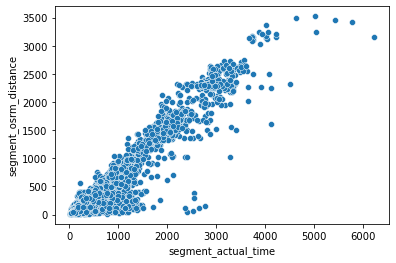

In [220]:
sns.scatterplot(final_grouped_data['segment_actual_time'], final_grouped_data['segment_osrm_distance'], data = final_grouped_data)

<AxesSubplot:xlabel='segment_osrm_time', ylabel='segment_osrm_distance'>

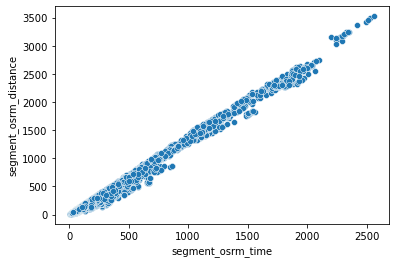

In [221]:
sns.scatterplot(final_grouped_data['segment_osrm_time'], final_grouped_data['segment_osrm_distance'], data = final_grouped_data)

In [268]:
# From the above plot, we can say system generated time and distance (osrm) having linear relationship but actual is not as 
# linear as osrm and It make sense as there many other factors which can affect the time and distance of a parcel delivery.

In [223]:
#outlier
q1 = final_grouped_data['segment_osrm_time'].quantile(0.25)
q3 = final_grouped_data['segment_osrm_time'].quantile(0.75)
iqr = q3-q1
q3 + 1.5*iqr 

154.0

In [225]:
#outlier
q1 = final_grouped_data['actual_time'].quantile(0.25)
q3 = final_grouped_data['actual_time'].quantile(0.75)
iqr = q3-q1
q3 + 1.5*iqr 

824.5

In [230]:
# From above we can say that If actual_time is greaater than 824.5 than It will be outlier  but It doesn't make sense as 
# we have lots of data greater than 824 and if distance will increase than time will increase and maybe not many people send 
# parcel for far distance so let's plot and see If It's normally distributed or not. We can see that It's nor normal distribution 
# so this may not be outlier or we mustnot remove these datapoints from our dataset.

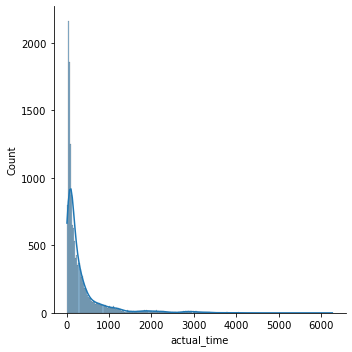

In [226]:
sns.displot(data=final_grouped_data, x="actual_time", kde=True)

In [240]:
final_grouped_data.columns

Index(['trip_uuid', 'data', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip_creation_date', 'trip_creation_day', 'trip_creation_month',
       'trip_creation_year', 'source_City', 'source_State', 'destination_city',
       'destination_state'],
      dtype='object')

In [262]:
# relationship between aggregated fields and handling categorical values!

# Here we have 'trip_creation_day', 'source_City', 'source_State', 'destination_city', 'destination_state' are categorical 
# feature. I'm usinh lebel encoder to convert it into numerical feature. We can use one_hot encoding as well.

from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
corr_feature = [
       'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'trip_creation_day', 'trip_creation_month', 
       'source_City', 'source_State', 'destination_city',
       'destination_state']
features = final_grouped_data[corr_feature]

features['trip_creation_day'] = label_encoder.fit_transform(features['trip_creation_day'])
features['trip_creation_month'] = label_encoder.fit_transform(features['trip_creation_month'])
features['source_City'] = label_encoder.fit_transform(features['source_City'])
features['source_State'] = label_encoder.fit_transform(features['source_State'])
features['destination_city'] = label_encoder.fit_transform(features['destination_city'])
features['destination_state'] = label_encoder.fit_transform(features['destination_state'])

<ipython-input-262-af54cd49485a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['trip_creation_day'] = label_encoder.fit_transform(features['trip_creation_day'])
<ipython-input-262-af54cd49485a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['trip_creation_month'] = label_encoder.fit_transform(features['trip_creation_month'])
<ipython-input-262-af54cd49485a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

<AxesSubplot:>

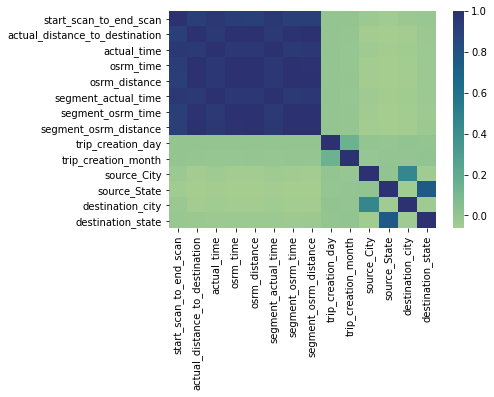

In [263]:

sns.heatmap(features[corr_feature].corr(method = 'pearson'), cmap='crest')

In [264]:
#From above heatmap, we can see that "actual and osrm" distance and time are related and It's completely make sense. Apart from
#that we can also see that "source and destination" city and state are also have some co relation, from this we can infer that
#trip is happening more is same state than another. We can see this by plotting the graphs.

In [265]:
#Column Normalization /Column Standardization
# 1. Normalization using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
norm_features = pd.DataFrame(mms.fit_transform(features))
norm_features.columns = corr_feature
norm_features.head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_day,trip_creation_month,source_City,source_State,destination_city,destination_state
0,0.021841,0.033974,0.025735,0.040967,0.034750,0.025398,0.032056,0.026643,0.666667,0.0,0.035191,0.28125,0.038168,0.232558
1,0.035429,0.042115,0.027813,0.043929,0.042486,0.027488,0.039093,0.034524,0.500000,0.0,0.152493,0.65625,0.767176,0.697674
2,0.010794,0.003412,0.008152,0.004936,0.003434,0.008198,0.003909,0.002766,0.000000,0.0,0.557185,0.65625,0.638677,0.697674
3,0.128000,0.166453,0.127238,0.236920,0.182141,0.126989,0.193901,0.156901,0.666667,0.0,0.089443,0.56250,0.021628,0.651163
4,0.030222,0.039718,0.022858,0.057749,0.040513,0.022826,0.051212,0.030353,0.333333,0.0,0.560117,0.81250,0.572519,0.837209


In [267]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
stand_features = pd.DataFrame(ss.fit_transform(features))
stand_features.columns = corr_feature
stand_features.head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_day,trip_creation_month,source_City,source_State,destination_city,destination_state
0,-0.509820,-0.266869,-0.333365,-0.266753,-0.261603,-0.335999,-0.295518,-0.289214,0.414846,-0.370449,-1.358908,-1.100968,-1.353678,-1.259705
1,-0.347368,-0.208821,-0.310208,-0.244642,-0.202474,-0.312627,-0.238290,-0.222729,-0.069228,-0.370449,-0.926613,0.268773,1.334707,0.326447
2,-0.641907,-0.484798,-0.529312,-0.535777,-0.500969,-0.528365,-0.524430,-0.490639,-1.521450,-0.370449,0.564803,0.268773,0.860838,0.326447
3,0.759434,0.677785,0.797781,1.196292,0.864972,0.800224,1.020725,0.809641,0.414846,-0.370449,-1.158972,-0.073662,-1.414671,0.167832
4,-0.409616,-0.225915,-0.365429,-0.141455,-0.217557,-0.364764,-0.139731,-0.257915,-0.553302,-0.370449,0.575610,0.839498,0.616866,0.802293


<AxesSubplot:xlabel='trip_creation_day', ylabel='count'>

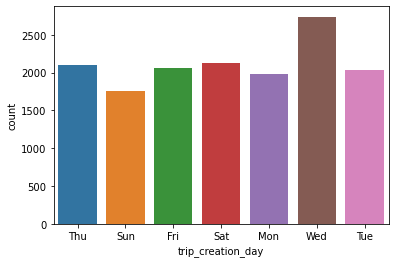

In [272]:
#more analysis

sns.countplot(final_grouped_data['trip_creation_day'])

<AxesSubplot:xlabel='trip_creation_month', ylabel='count'>

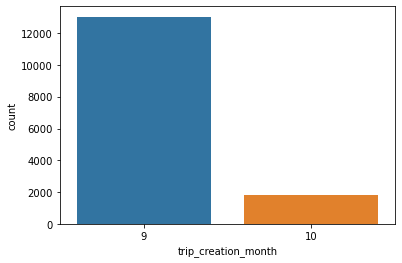

In [271]:
sns.countplot(final_grouped_data['trip_creation_month'])

<AxesSubplot:xlabel='source_State', ylabel='count'>

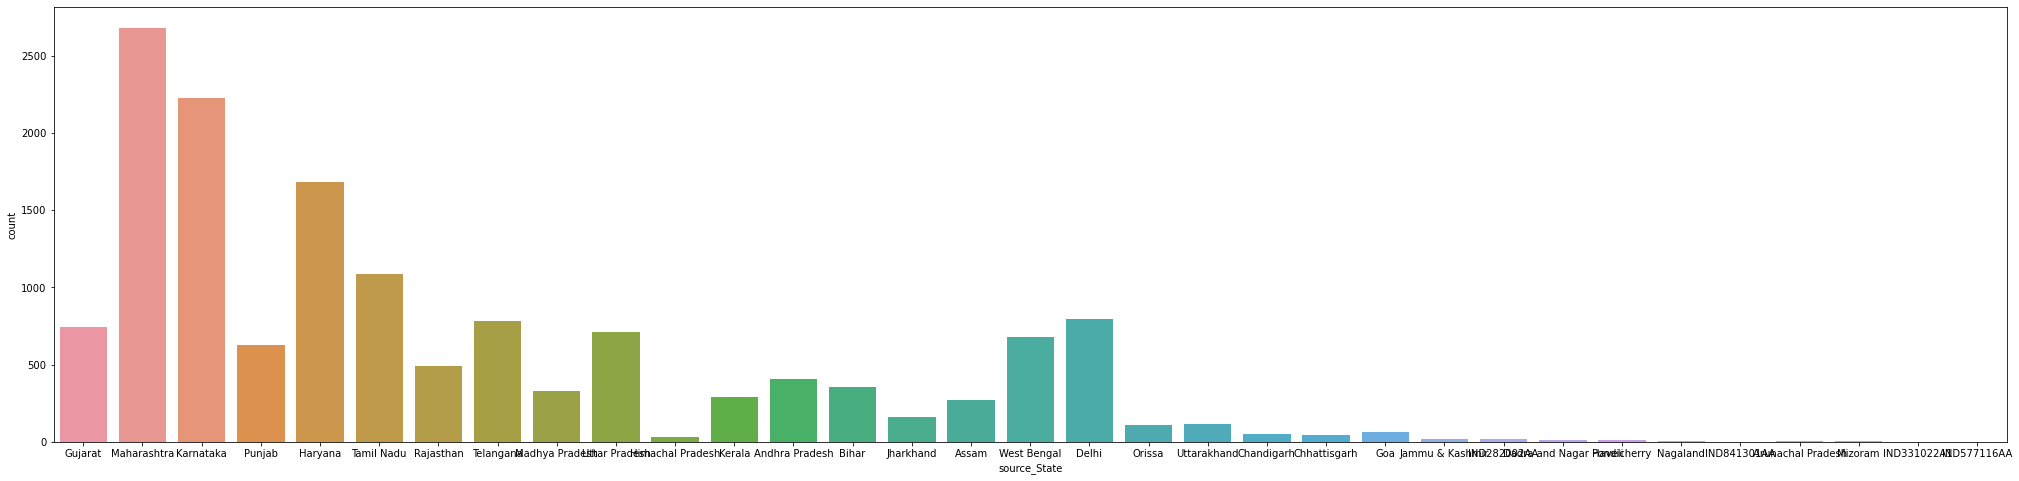

In [276]:
plt.figure(figsize=(35,8))
sns.countplot(final_grouped_data['source_State'])

<AxesSubplot:xlabel='destination_state', ylabel='count'>

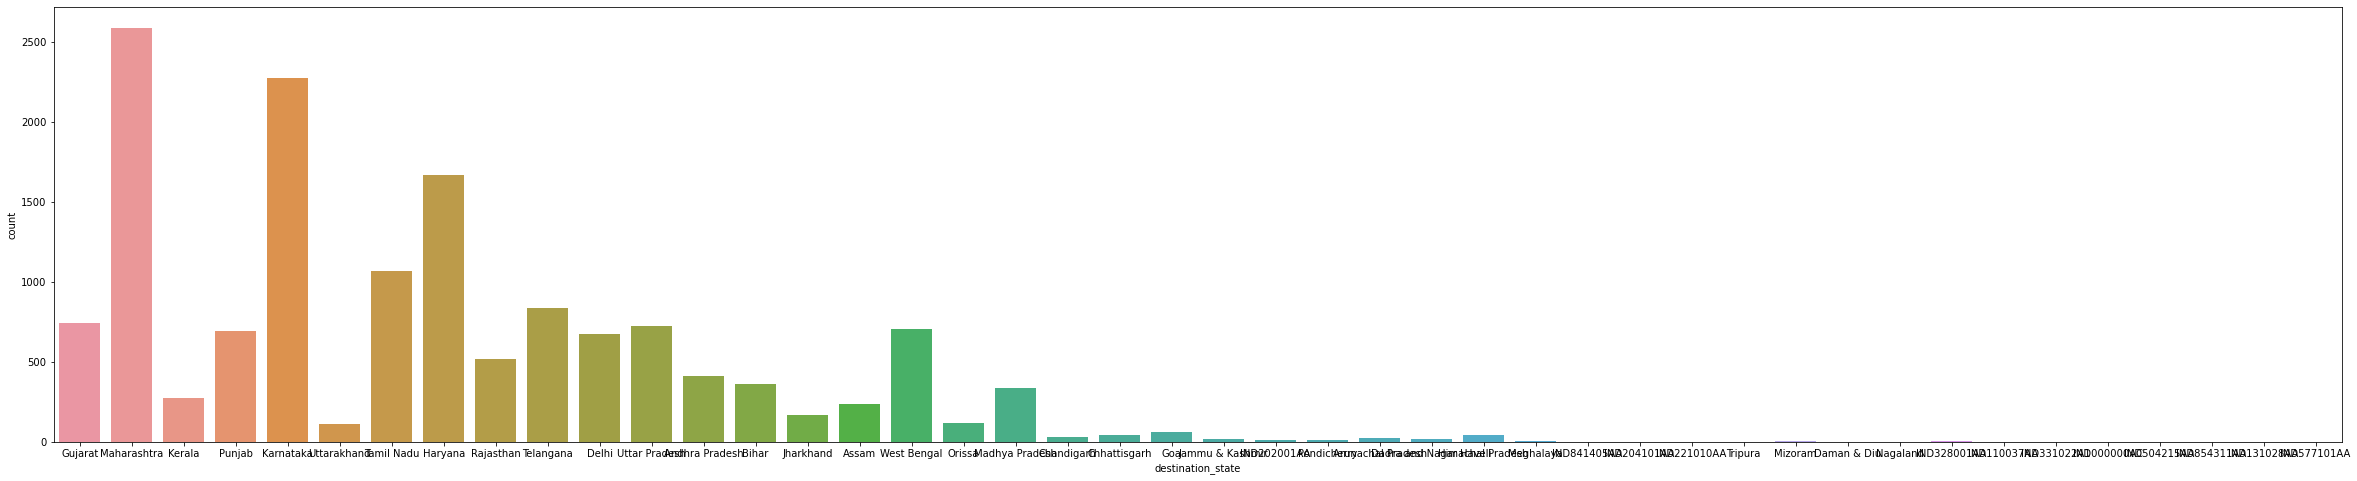

In [282]:
plt.figure(figsize=(41,8))
sns.countplot(final_grouped_data['destination_state'])

In [ ]:
# From above plots, we can say that top 3 states for most delivery are "Maharashtra, Karnataka and Haryana".
# Delivery registration on Wednesday is higher compare to other days.
# Here I'm suspecting that we don't have full data of October month but suppose If we have full data then frequency of 
# delivery creation on september is much higher than October.